In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import srkgraphics
import srkmisc
import srkdata
import srkanalysis
import math
import ROOT
from ROOT import TF1,gPad,gStyle,TCanvas,TH1D,gROOT
import rootnotes
import rootprint
gStyle.SetOptFit()
c1=rootnotes.canvas("Canvas", (1200, 800))
c1.SetRightMargin(0.3)
histogram = TH1D("phi_hist","phi_hist",100,-5,5)
histwnoise = TH1D("phi_hist","phi_histw_noise",100,-5,5)

TROOT::Append:0: RuntimeWarning: Replacing existing TH1: phi_hist (Potential memory leak).
TROOT::Append:0: RuntimeWarning: Replacing existing TH1: phi_hist (Potential memory leak).


4845.77459473 1.2080549279
6586.0
0.831343493519
OK        
2968.42379565


TROOT::Append:0: RuntimeWarning: Replacing existing TH1: phi_hist (Potential memory leak).


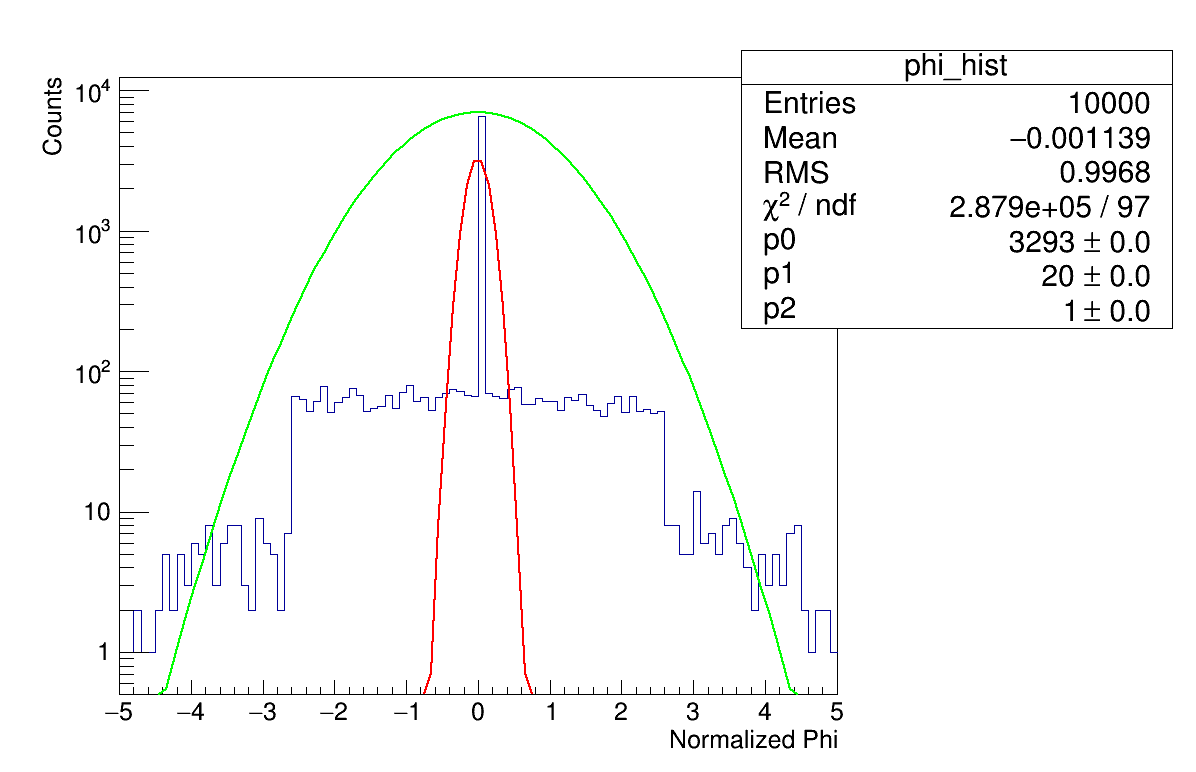

In [4]:
c1.Clear()
rid=7610
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"PhiMean,"+par_str+"PhiStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print mean, stdev
histogram.IsA().Destructor( histogram )
range_val=5
histogram = TH1D("phi_hist","phi_hist",100,-range_val,range_val)



drawString="(phi-"+str(mean)+")/"+str(stdev)+" >> phi_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle(";Normalized Phi;Counts")
histogram.Draw()
qGaussianFunc = TF1("qGaussianFunc", "[0]*pow(1+([2]-1)*[1]*x*x,-1/([2]-1))")
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
print max_bin
print histogram.GetKurtosis()/range_val
qGaussianFunc.SetParLimits(1,0.1,20)
qGaussianFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
qGaussianFunc.SetParLimits(2,1.0001,3)
qGaussianFunc.SetParameters(max_bin, 3,2)
qGaussianFunc.Print()
histogram.Fit("qGaussianFunc","MV")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
print qGaussianFunc.GetChisquare() / qGaussianFunc.GetNDF()
# qGaussianFunc.Draw("same")
gaus = TF1("gaus","7000*TMath::Gaus(x,0,1)",-range_val,range_val)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
# histwnoise.IsA().Destructor( histwnoise )
# histwnoise=srkanalysis.make_phi_hist_with_noise(rid, par, srkmisc.get_hist_dim(histogram), 2*stdev,True)
# histwnoise.SetLineColor(ROOT.kCyan)
# histwnoise.Draw("same")
c1.SetLogy()
c1




-0.459008741897 1.48352579792
1773.0
-0.310176359779
OK        
391.304091941


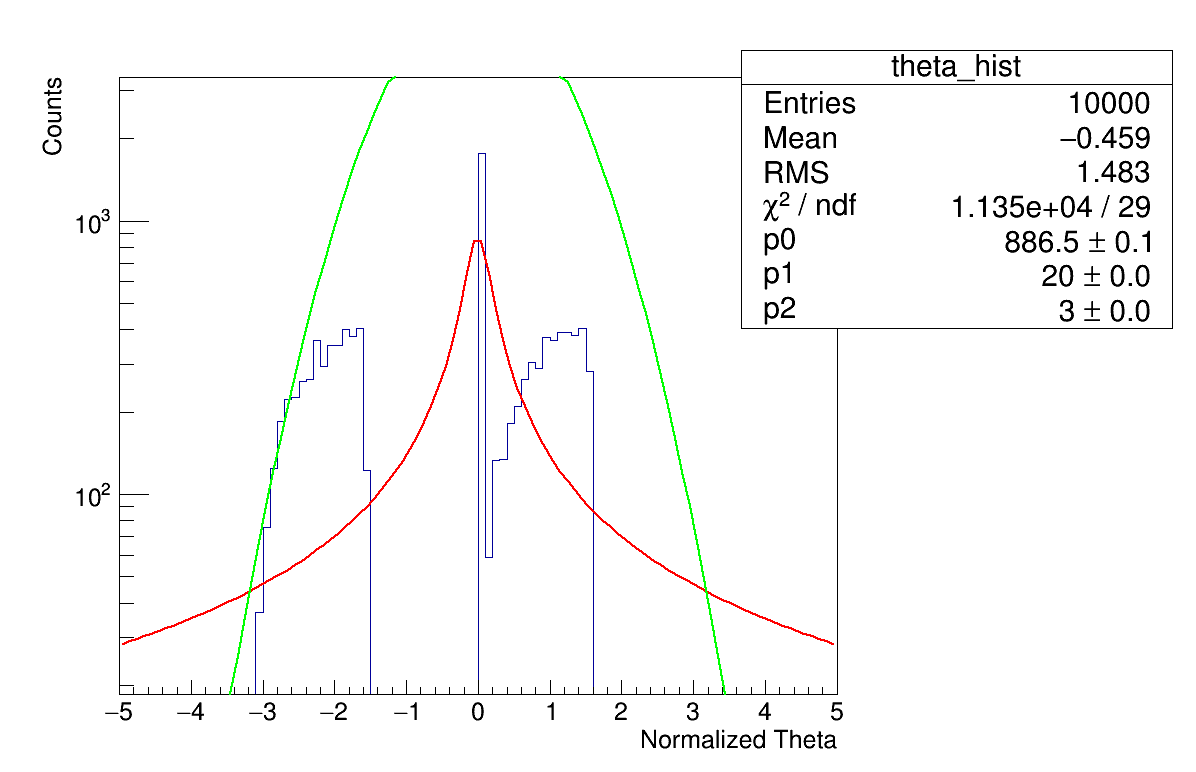

In [7]:
c1.Clear()
rid=7608
par=True
par_str='Par_' if par else 'Anti_'
mean,stdev,dip_pos,dip_str = srkdata.get_data_for_rids_from_database([rid],par_str+"ThetaMean,"+par_str+"ThetaStDev,DipolePositionBelowChamber,DipoleFieldStrength")[0]
print mean, stdev
histogram.IsA().Destructor( histogram )
range_val=5
histogram = TH1D("theta_hist","theta_hist",100,-range_val,range_val)



drawString="theta >> theta_hist"
c1=srkgraphics.make_root_plot_from_results_file(rid,par,drawString)
histogram.SetTitle(";Normalized Theta;Counts")
histogram.Draw()
qGaussianFunc = TF1("qGaussianFunc", "[0]*pow(1+([2]-1)*[1]*x*x,-1/([2]-1))")
max_bin=histogram.GetBinContent(histogram.GetMaximumBin())
print max_bin
print histogram.GetKurtosis()/range_val
qGaussianFunc.SetParLimits(1,0.1,20)
qGaussianFunc.SetParLimits(0,0.5*max_bin,1.5*max_bin)
qGaussianFunc.SetParLimits(2,1.0001,3)
qGaussianFunc.SetParameters(max_bin, 3,2)
qGaussianFunc.Print()
histogram.Fit("qGaussianFunc","MV")
if ROOT.gMinuit.fCstatu == "CONVERGED ":
    print "YAY!!!"
print ROOT.gMinuit.fCstatu
print qGaussianFunc.GetChisquare() / qGaussianFunc.GetNDF()
# qGaussianFunc.Draw("same")
gaus = TF1("gaus","7000*TMath::Gaus(x,0,1)",-range_val,range_val)
gaus.SetLineColor(ROOT.kGreen)
gaus.Draw("same")
# histwnoise.IsA().Destructor( histwnoise )
# histwnoise=srkanalysis.make_phi_hist_with_noise(rid, par, srkmisc.get_hist_dim(histogram), 2*stdev,True)
# histwnoise.SetLineColor(ROOT.kCyan)
# histwnoise.Draw("same")
c1.SetLogy()
c1


